# Atlas region

In [1]:
from nilearn import datasets
from nilearn import plotting 
from nilearn import image 

/data/brambati/local/venvs/lingualab_workstation/lib/python3.8/site-packages/nilearn/datasets/atlas.py:288: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


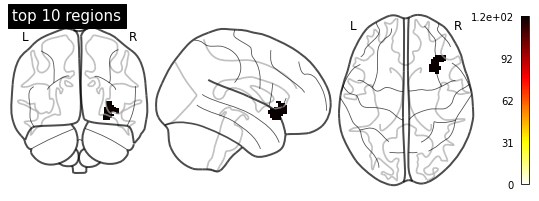

In [2]:
destrieux_atlas = datasets.fetch_atlas_destrieux_2009()

# regions of interest 

best = [123]

dest_img = image.load_img(destrieux_atlas.maps)

dest_affine = dest_img.affine

dest_img_data = dest_img.get_fdata()

dest_img_data_best = dest_img_data.copy()

dest_img_data_best[dest_img_data!=best] = 0

best_img = image.new_img_like(dest_img, dest_img_data_best, affine = dest_affine, copy_header = True)


plotting.plot_glass_brain (best_img, colorbar = True, title = "top 10 regions")


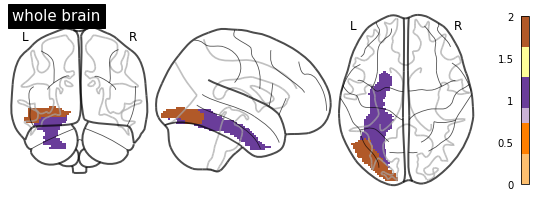

In [7]:

# Load the atlas
aal = datasets.fetch_atlas_aal(version='SPM12')
#my regions of interest indices: 5401, 5301
Fusiform_L = 5401
Occipital_Inf_L = 5301
# Load AAL img
aal_img = image.load_img(aal.maps)
# Get the affine
aal_affine = aal_img.affine
# Get the data of the map
aal_img_data = aal_img.get_fdata()
# For each region, zero-out any region that is not the region of interest
# Start with Fusiform_L
aal_img_data_fusiform_l = aal_img_data.copy()
aal_img_data_fusiform_l[aal_img_data!=Fusiform_L] = 0
aal_img_data_fusiform_l = (aal_img_data_fusiform_l / Fusiform_L) * 1
# Now with Occipital_Inf_L
aal_img_data_occipital_inf_l = aal_img_data.copy()
aal_img_data_occipital_inf_l[aal_img_data!=Occipital_Inf_L] = 0
aal_img_data_occipital_inf_l = (aal_img_data_occipital_inf_l / Occipital_Inf_L) * 2
# Save these zeroed-out matrices as new img objects

whole_brain = aal_img_data_fusiform_l + aal_img_data_occipital_inf_l

# fusiform_l_img = nilearn.image.new_img_like(aal_img, aal_img_data_fusiform_l, 
#                                              affine=aal_affine, copy_header=True)
# occipital_inf_l_img = nilearn.image.new_img_like(aal_img, aal_img_data_occipital_inf_l, 
#                                                  affine=aal_affine, copy_header=True)

whole_brain_img = image.image.new_img_like(aal_img, whole_brain, affine=aal_affine, copy_header=True)
# Plot the imgs
# nilearn.plotting.plot_glass_brain(fusiform_l_img, colorbar=True, title='Fusiform_L')
# nilearn.plotting.plot_glass_brain(occipital_inf_l_img, colorbar=True, title='Occipital_Inf_L')

plotting.plot_glass_brain(whole_brain_img, colorbar=True, title='whole brain', cmap="Paired")

# Destrieux

In [22]:
atlas_dest = datasets.fetch_atlas_destrieux_2009(legacy_format=False)
label = atlas_dest["labels"].drop([0,42,117])
label = label.reset_index()

In [23]:
# index of top 10 region (the tenth is the same as the first one)
print(label.loc[label["name"] == "L S_front_sup"])
print(label.loc[label["name"] == "R G_pariet_inf-Angular"])
print(label.loc[label["name"] == "R G_front_inf-Orbital"])
print(label.loc[label["name"] == "L G_and_S_transv_frontopol"])
print(label.loc[label["name"] == "L S_interm_prim-Jensen"])
print(label.loc[label["name"] == "L G_oc-temp_lat-fusifor"])
print(label.loc[label["name"] == "L G_cingul-Post-ventral"])
print(label.loc[label["name"] == "L Pole_occipital"])
print(label.loc[label["name"] == "L S_calcarine"])

    index           name
53     55  L S_front_sup
    index                    name
98    100  R G_pariet_inf-Angular
    index                   name
86     88  R G_front_inf-Orbital
   index                        name
4      5  L G_and_S_transv_frontopol
    index                    name
54     56  L S_interm_prim-Jensen
    index                     name
20     21  L G_oc-temp_lat-fusifor
   index                     name
9     10  L G_cingul-Post-ventral
    index              name
41     43  L Pole_occipital
    index           name
43     45  L S_calcarine


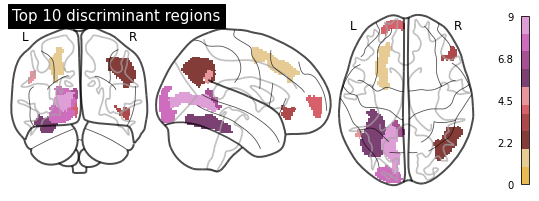

In [43]:
index = [55, 100, 88, 5, 56, 21, 10, 43, 45]
offset_counter = 1

dest_img = image.load_img(atlas_dest.maps)
dest_affine = dest_img.affine
dest_img_data = dest_img.get_fdata()
whole_brain = dest_img_data.copy()
whole_brain[True] = 0

for i in index:
    dest_img_data_index = dest_img_data.copy()
    dest_img_data_index[dest_img_data_index!=i] = 0
    dest_img_data_index = (dest_img_data_index / i) * offset_counter
    whole_brain += dest_img_data_index
    offset_counter += 1
    
whole_brain_img = image.image.new_img_like(dest_img, whole_brain, affine=dest_affine, copy_header=True)
plotting.plot_glass_brain(whole_brain_img, colorbar=True, title='Top 10 discriminant regions', cmap="tab20b")